## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

**Sample variability**: This proportion depends on the people that you happened to draw.

Given this poll what wan we really say about the underlying population of voters?

In [9]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

Suppose that the True Brown fraction over the entire population is indeed 0.51. Let's see one possible sample, and the counts for the two candidates.

In [10]:
s = sample(0.51, n=1000)

In [11]:
s.vote.value_counts(normalize=True)

Brown    0.5
Green    0.5
Name: vote, dtype: float64

In [13]:
dist = pd.DataFrame((sample(0.51).vote.value_counts(normalize=True) for i in range(1000)))

In [14]:
dist.head()

,Green,Brown
vote,0.511,0.489
vote,0.463,0.537
vote,0.483,0.517
vote,0.474,0.526
vote,0.525,0.475


<AxesSubplot:>

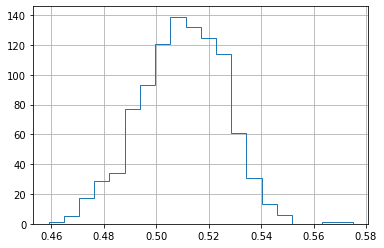

In [15]:
dist.Brown.hist(histtype='step', bins=20)

# Confidence interval

- Built from the data
- Contains the true value of a population parameter XX% of the time
- Over many similar experiments

In [19]:
def samplingdist(brown, n=1000):
    return pd.DataFrame((sample(brown, n).vote.value_counts(normalize=True) for i in range(1000)))

Let's say that we want to go for the 95% CI. This will lie between the 2.5% quantile and the 97.5% quantile. So we look for a the true fraction for which a measured value of 0.51 lies at a 2.5% quantile, and the true fraction for which our measured value lies at the 97.5 quantile. These fractions are the edges of our confidence interval.

In [20]:
def quantiles(brown, n=1000):
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [21]:
quantiles(0.50)

(0.468, 0.531025)

In [22]:
quantiles(0.48)

(0.448975, 0.513)

In [23]:
quantiles(0.54)

(0.5079750000000001, 0.571)

So for an observed sample proportion of 0.51, when the sample size is 1000, the 95% confidence interval for the True population function is 0.48 to 0.54.

- 95% CI: [0.48, 0.54]
- Estimate = 0.51 +- 0.03 (at 95% confidence interval)
          Point estimate +- margin of error
          
Thus, the result of this election lies within the margin of error of the poll.

We can do better by increasing the size of the sample. How much bigger does it need to be?

Let's create a sampling distribution for a True fraction of 50%, and with 10,000 samples:

In [24]:
dist = samplingdist(0.5, 10000)

<AxesSubplot:>

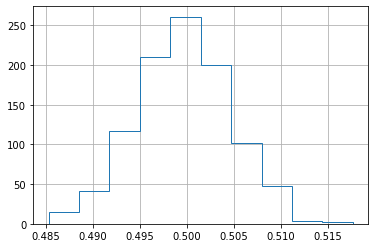

In [25]:
dist.Brown.hist(histtype='step')

Now the margin of error is closer to 1%, which would have been sufficient to claim Brown as the likely winner.

Under general conditions, it can be shown that the margin of error improves with the square root of the number of samples.